In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import erfc, erf
from scipy.stats import skew
import matplotlib

import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

## Load data

In [3]:

# Load tmax_vec
with open('data/tmax_vec.pkl', 'rb') as f:
    tmax_vec = pickle.load(f)

# Load optimum_vec
with open('data/optimum_vec.pkl', 'rb') as f:
    optimum_vec = pickle.load(f)

In [4]:
num_pts=1000
xvec=np.linspace(-3,6,3*num_pts)


## Fit logarithm

In [5]:

# Sample data
x_data = tmax_vec
y_data = optimum_vec

# Define the logarithmic function for fitting
def log_function(x, a, b):
    return a * np.log(x) + b

# Perform the curve fitting
params, covariance = curve_fit(log_function, x_data, y_data)


## Plotting

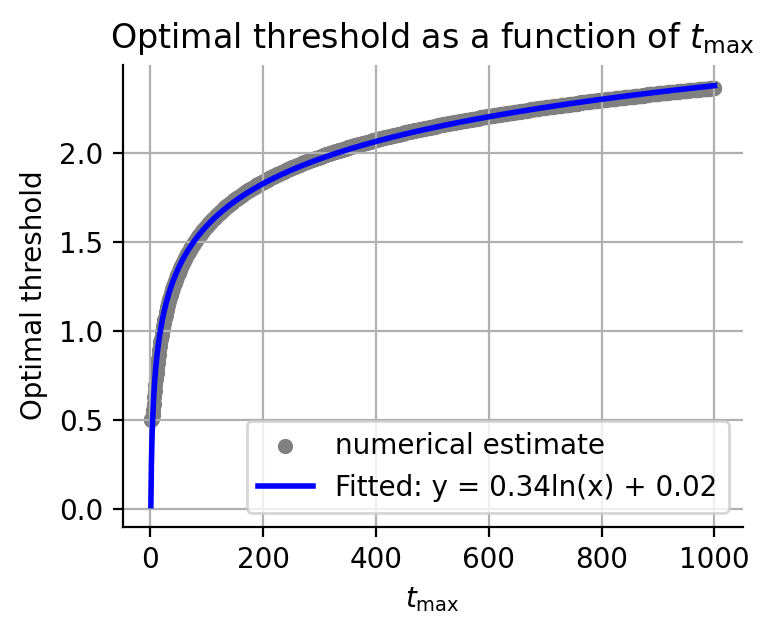

In [6]:

# Define the custom color palette
mypurple = '#9A78FB'
myblack = '#222222'
myyellow = '#E4B700'
myteal = '#00A6A6'

# Create the figure and axis
fig, ax = plt.subplots(figsize=(4, 3),dpi=200)
# Plotting the original data and the fitted curve
ax.scatter(x_data, y_data, label='numerical estimate', color='grey', s=20)  # Teal for data points, with larger size
ax.plot(x_data, log_function(x_data, *params), label=f'Fitted: y = {params[0]:.2f}ln(x) + {params[1]:.2f}', color='blue', linewidth=2)  # Purple for fitted curve


# Set labels and title with LaTeX-style formatting
ax.set_xlabel(r'$t_{\mathrm{max}}$', fontsize=10)
ax.set_ylabel('Optimal threshold', fontsize=10)
ax.set_title(r'Optimal threshold as a function of $t_{\mathrm{max}}$', fontsize=12)

# Add a legend and grid
plt.legend(loc='best', fontsize=10)
plt.grid(True)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()




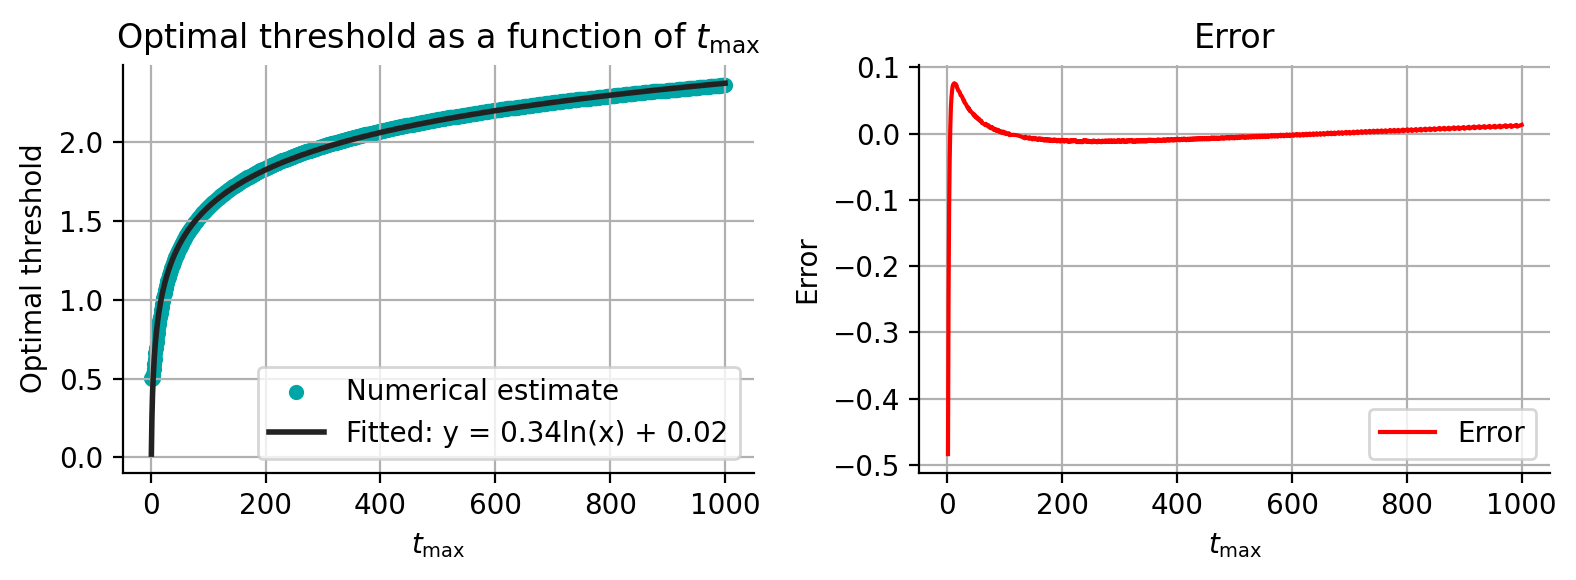

In [7]:
# Create the figure with 2 subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

# First subplot: Scatter plot and fitted curve
ax1.scatter(x_data, y_data, label='Numerical estimate', color=myteal, s=20)
ax1.plot(x_data, log_function(x_data, *params), label=f'Fitted: y = {params[0]:.2f}ln(x) + {params[1]:.2f}', color=myblack, linewidth=2)

# Set labels, title, and legend for the first plot
ax1.set_xlabel(r'$t_{\mathrm{max}}$', fontsize=10)
ax1.set_ylabel('Optimal threshold', fontsize=10)
ax1.set_title(r'Optimal threshold as a function of $t_{\mathrm{max}}$', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True)

# Second subplot: Error plot
ax2.plot(x_data, log_function(x_data, *params) - y_data, label='Error', color='red')
ax2.set_title('Error', fontsize=12)
ax2.set_xlabel(r'$t_{\mathrm{max}}$', fontsize=10)
ax2.set_ylabel('Error', fontsize=10)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True)

# Remove top and right spines for both plots
sns.despine()


plt.tight_layout()
plt.savefig('output/optimal_threshold.pdf', format='pdf', bbox_inches='tight')
plt.show()